In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization, GlobalAveragePooling2D

In [2]:
#set path train and test folder
trainpath = "C:/Users/LENOVO/Desktop/Mini_Project/Img/Train/"
testpath = "C:/Users/LENOVO/Desktop/Mini_Project/Img/Test/"
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]

In [3]:
def data(path):
  Images = []
  Labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = join(imagePath, item)
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img,(224,224))
            Images.append(img)

            l = imagePath.split('/')[7]

            if l == 'Aster':
              Labels.append([1,0,0,0,0,0,0,0,0,0])
            elif l == 'Daisy':
              Labels.append([0,1,0,0,0,0,0,0,0,0])
            elif l == 'Dandelion':
              Labels.append([0,0,1,0,0,0,0,0,0,0])
            elif l == 'Lavender':
              Labels.append([0,0,0,1,0,0,0,0,0,0])
            elif l == 'Lily':
              Labels.append([0,0,0,0,1,0,0,0,0,0])
            elif l == 'Marigold':
              Labels.append([0,0,0,0,0,1,0,0,0,0])
            elif l == 'Poppy':
              Labels.append([0,0,0,0,0,0,1,0,0,0])
            elif l == 'Rose':
              Labels.append([0,0,0,0,0,0,0,1,0,0])
            elif l == 'Sunflower':
              Labels.append([0,0,0,0,0,0,0,0,1,0])
            elif l == 'Tulips':
              Labels.append([0,0,0,0,0,0,0,0,0,1])
  return Images, Labels

In [4]:
x_train, y_train = data(trainImg)
x_test, y_test = data(testImg)

100%|██████████| 300/300 [00:00<00:00, 746.27it/s]


In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalization
x_train /= 255
x_test /= 255

In [6]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((7000, 224, 224, 3), (7000, 10), (3000, 224, 224, 3), (3000, 10))

................... Train .....................

In [7]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), 
                                               include_top=False, 
                                               weights='imagenet')
base_model.trainable = False
num_classes = 10

model = Sequential([
        base_model,

        # Conv2D(128, 3, activation='relu'),

        # MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(32, activation='relu'),

        Dense(num_classes, activation='softmax')
    ])

In [26]:
# base_model = tf.keras.applications.ResNet50(input_shape=(224,224,3),
#                                                    include_top=False,
#                                                    weights='imagenet')
# base_model.trainable = False
# num_classes = 10

# model = Sequential([
#         base_model,

#         Conv2D(128, 3, activation='relu'),

#         MaxPooling2D(pool_size=(2, 2)),

#         Flatten(),
#         Dense(64, activation='relu'),

#         Dense(num_classes, activation='softmax')
#     ])

In [43]:
# base_model = tf.keras.applications.ResNet50V2(input_shape=(224,224,3),
#                                                    include_top=False,
#                                                    weights='imagenet')
# base_model.trainable = False
# num_classes = 10

# model = Sequential([
#         base_model,


#         Conv2D(128, 3, activation='relu'),

#         MaxPooling2D(pool_size=(2, 2)),

#         Flatten(),
#         Dense(32, activation='relu'),

#         Dense(num_classes, activation='softmax')
#     ])

In [10]:
# base_model = tf.keras.applications.EfficientNetB0(input_shape=(224,224,3),
#                                                    include_top=False,
#                                                    weights='imagenet')
# base_model.trainable = False
# num_classes = 10

# model = Sequential([
#         base_model,
#         Conv2D(128, 3, activation='relu'),

#         MaxPooling2D(pool_size=(2, 2)),

#         Flatten(),
#         Dense(64, activation='relu'),

#         Dense(num_classes, activation='softmax')
#     ])

In [26]:
# base_model = tf.keras.applications.EfficientNetB1(input_shape=(224,224,3),
#                                                    include_top=False,
#                                                    weights='imagenet')
# base_model.trainable = False
# num_classes = 10

# model = Sequential([
#         base_model,


#         Flatten(),
#         Dense(128, activation='relu'),

#         Dense(num_classes, activation='softmax')
#     ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 32)                2007072   
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 4265386 (16.27 MB)
Trainable params: 2007402 (7.66 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics= ['accuracy'])
history = model.fit(x_train, y_train ,batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
219/219 [==============================] - 122s 542ms/step - loss: 0.4402 - accuracy: 0.8613 - val_loss: 0.1920 - val_accuracy: 0.9453
Epoch 2/10
219/219 [==============================] - 111s 510ms/step - loss: 0.0380 - accuracy: 0.9910 - val_loss: 0.1364 - val_accuracy: 0.9593
Epoch 3/10
219/219 [==============================] - 108s 494ms/step - loss: 0.0086 - accuracy: 0.9994 - val_loss: 0.1347 - val_accuracy: 0.9610
Epoch 4/10
219/219 [==============================] - 111s 506ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1285 - val_accuracy: 0.9623
Epoch 5/10
219/219 [==============================] - 113s 517ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1303 - val_accuracy: 0.9633
Epoch 6/10
219/219 [==============================] - 110s 503ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1299 - val_accuracy: 0.9633
Epoch 7/10
219/219 [==============================] - 137s 628ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1321 -

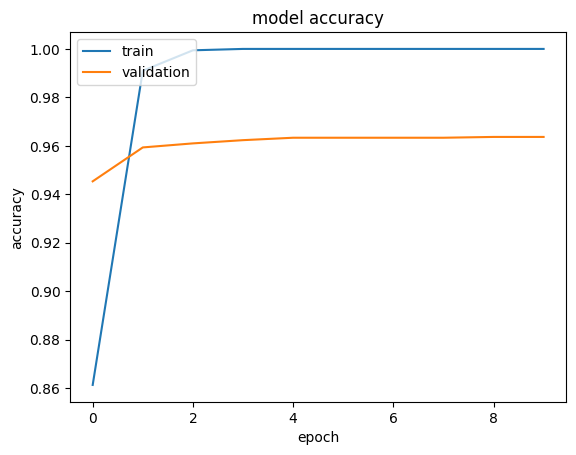

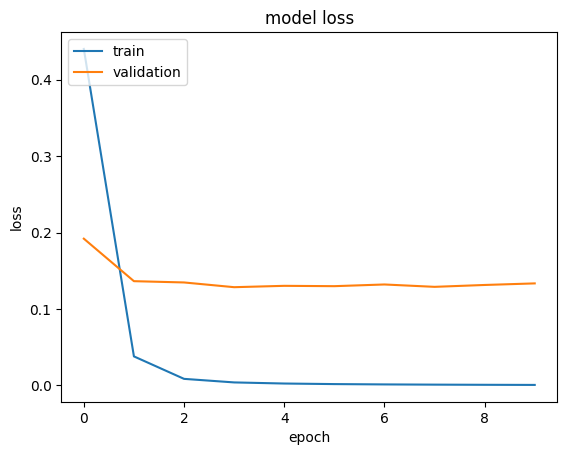

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

................... Test .....................

In [11]:
testpath = "C:/Users/LENOVO/Desktop/Mini_Project/Img/Test/"
testImg = [testpath+f for f in listdir(testpath)]
rimg = []
label_pred = []
for imagePath in (testImg):
    for i,item in enumerate(listdir(imagePath)):

        file = join(imagePath, item)
        if item.split('.')[0] != "":

          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(224,224))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,224,224,3))
          predict = model.predict(rimg)
          label = ['Aster', 'Daisy', 'Dandelion', 'Lavender', 'Lily', 'Marigold', 'Poppy', 'Rose', 'Sunflower', 'Tulips']
          result = label[np.argmax(predict)]
          label_pred.append(result)
          print(predict)
          print('real:'+str(item))
          print('predict:'+str(result))
          plt.imshow(ori)
          plt.show()

          # Convert the label back to the original format
          prob_classes = np.argmax(predict, axis=-1)

          # Print the probability distribution
          for idx in range(len(predict)):
            for i in range(7):
              print(f'{label[i]} ({predict[idx][i]*100:.2f}%)')
          print(f'Predicted class: {label[prob_classes[idx]]}')
          print('')

1/1 [==============================] - 0s 72ms/step


In [12]:
score = model.evaluate(x=x_test, y=y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1334896981716156
Test accuracy: 0.9636666774749756


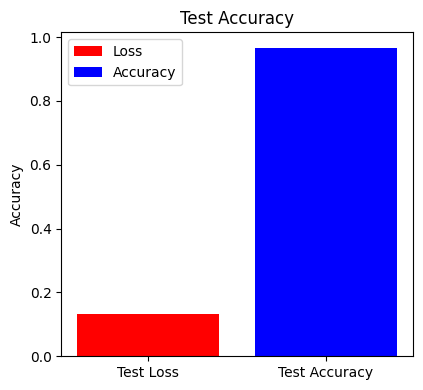

In [28]:
import matplotlib.pyplot as plt

# Test loss and accuracy values
test_loss = score[0]
test_accuracy = score[1]

# Create a bar plot for Test loss and accuracy
plt.figure(figsize=(8, 4))

# Plot Test loss
plt.subplot(1, 2, 2)
plt.bar(['Test Loss'], [test_loss], color='red')
plt.ylabel('Loss')
plt.title('Test Loss')

# Plot Test accuracy
plt.subplot(1, 2, 2)
plt.bar(['Test Accuracy'], [test_accuracy], color='blue')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend(['Loss', 'Accuracy'])
plt.tight_layout()
plt.show()


..........Confusion Matrix..........

In [32]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [33]:
label_mapping = {
    'Aster': [1,0,0,0,0,0,0,0,0,0],
    'Daisy': [0,1,0,0,0,0,0,0,0,0],
    'Dandelion': [0,0,1,0,0,0,0,0,0,0],
    'Lavender': [0,0,0,1,0,0,0,0,0,0],
    'Lily': [0,0,0,0,1,0,0,0,0,0],
    'Marigold': [0,0,0,0,0,1,0,0,0,0],
    'Poppy': [0,0,0,0,0,0,1,0,0,0],
    'Rose': [0,0,0,0,0,0,0,1,0,0],
    'Sunflower': [0,0,0,0,0,0,0,0,1,0],
    'Tulips': [0,0,0,0,0,0,0,0,0,1]
}

label_true = []

for row in y_test:
    for key, value in label_mapping.items():
        if (row == value).all():
            label_true.append(key)
            break

In [34]:
# Creating  a confusion matrix,which compares the label_true and label_pred
labels = ['Aster', 'Daisy', 'Dandelion', 'Lavender', 'Lily', 'Marigold', 'Poppy', 'Rose', 'Sunflower', 'Tulips']
cm = confusion_matrix(label_true, label_pred, labels=labels)
print(cm)

[[292   3   0   3   0   0   1   0   1   0]
 [ 10 272   3   1   4   1   2   1   6   0]
 [  0   1 292   0   0   1   2   0   4   0]
 [  1   0   1 296   0   0   0   0   0   2]
 [  0   0   0   1 293   1   0   3   0   2]
 [  0   2   0   1   0 294   3   0   0   0]
 [  1   1   1   0   0   0 293   2   1   1]
 [  0   0   0   0   2   2   0 292   1   3]
 [  1   5   0   2   0   2   0   1 287   2]
 [  0   0   1   0   7   0   2   2   0 288]]


In [35]:
# Creating  a confusion matrix,which compares the label_true and label_pred
cm = confusion_matrix(label_true, label_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Aster', 'Daisy', 'Dandelion', 'Lavender', 'Lily', 'Marigold', 'Poppy', 'Rose', 'Sunflower', 'Tulips'],
                     columns = ['Aster', 'Daisy', 'Dandelion', 'Lavender', 'Lily', 'Marigold', 'Poppy', 'Rose', 'Sunflower', 'Tulips'])
#Plotting the confusion matrix

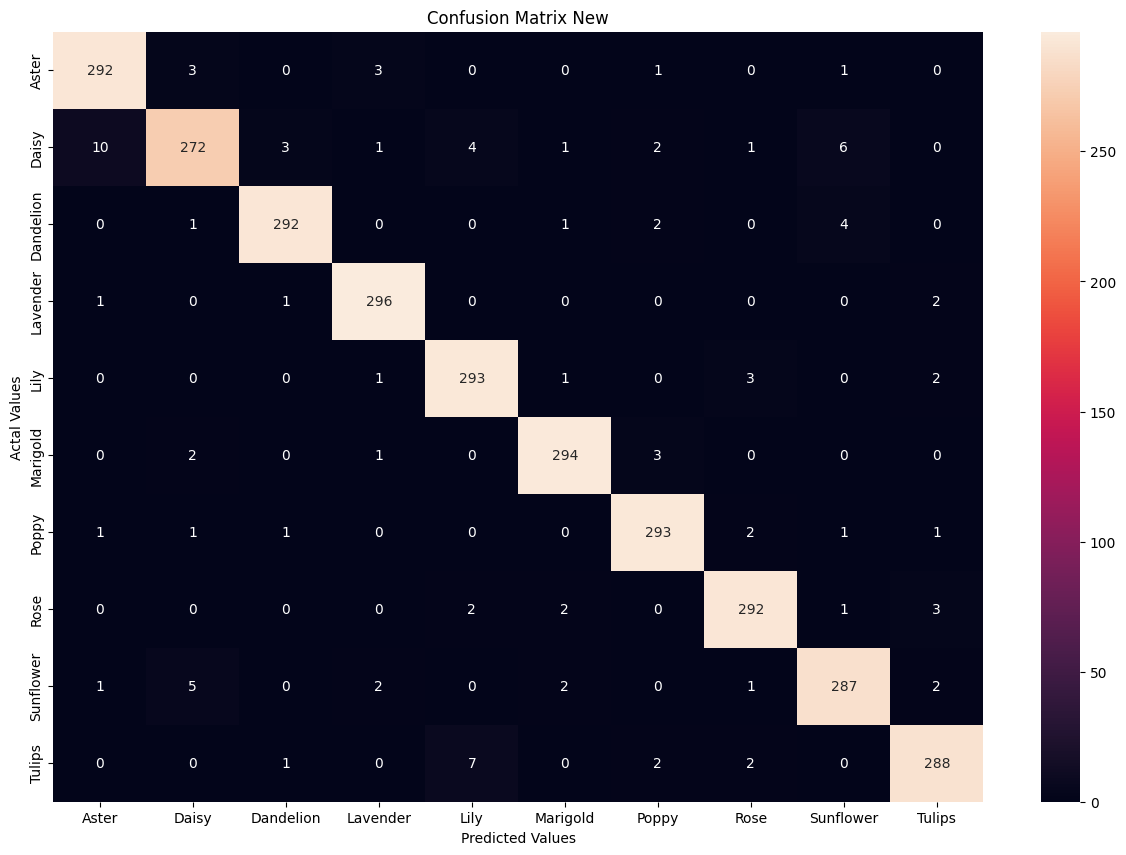

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix New')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

..........F1-Score..........

In [37]:
from sklearn import metrics
import numpy as np
print(metrics.classification_report(label_true, label_pred))

              precision    recall  f1-score   support

       Aster       0.96      0.97      0.97       300
       Daisy       0.96      0.91      0.93       300
   Dandelion       0.98      0.97      0.98       300
    Lavender       0.97      0.99      0.98       300
        Lily       0.96      0.98      0.97       300
    Marigold       0.98      0.98      0.98       300
       Poppy       0.97      0.98      0.97       300
        Rose       0.97      0.97      0.97       300
   Sunflower       0.96      0.96      0.96       300
      Tulips       0.97      0.96      0.96       300

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



..........ROC Curve..........

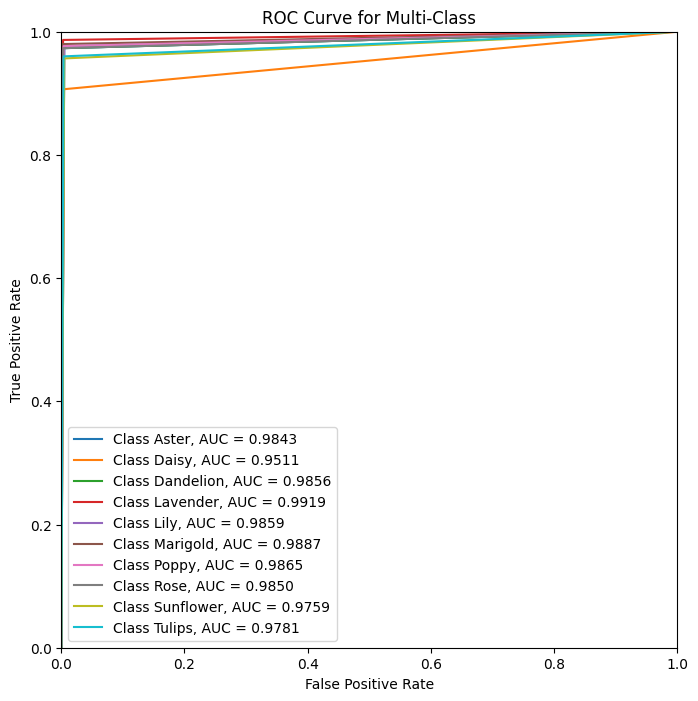

In [39]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Assuming label_true and label_pred contain true labels and predicted labels respectively
# labels list contains the class labels

# Calculate ROC for each class
lb = LabelBinarizer()
lb.fit(label_true)
label_true_binary = lb.transform(label_true)
label_pred_binary = lb.transform(label_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve for Multi-Class")

for i in range(len(labels)):
    fpr, tpr, _ = metrics.roc_curve(label_true_binary[:, i], label_pred_binary[:, i])
    auc = metrics.auc(fpr, tpr)  # Calculate AUC
    plt.plot(fpr, tpr, label=f'Class {labels[i]}, AUC = {auc:.4f}')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

................... Save Model .....................

In [21]:
model.save('model.Flower')

INFO:tensorflow:Assets written to: model.Flower\assets


INFO:tensorflow:Assets written to: model.Flower\assets
